# Ocean Circulation Diagnostics

### PATH to import function

In [2]:
import os
os.chdir("..")
print(os.getcwd())

/home/b/b382397/AQUA/diagnostics/ocean_circulation


### Import modules

In [3]:
%load_ext autoreload
%autoreload 2
from aqua import Reader,catalogue, inspect_catalogue
import ocean_circulation_func as fn
from aqua.util import load_yaml

FDB5 binary library not present on system, disabling FDB support.


### Model Data import

In [4]:
# Here we load the data of a model (chosen from the catalog as an example )
reader = Reader(model='FESOM', exp='tco2559-ng5-cycle3', source="lra-r100-monthly")
dmod = reader.retrieve()

dmod=dmod.rename({"nz1":"lev"}) # We standardise the name for the vertical dimension
dmod=dmod[["ocpt","so"]].resample(time="M").mean() # And we keep only the relevant variables in the dataset

### Config file 

In [40]:
config = load_yaml("config.yaml")
outputfig= config["outputfig"]
output= config["outputdir"]



## Functions:
    There are several function in ocean_circulation_func

    Main two diagnostics functions are:
### 1. plot_stratification
plot_stratification(mod_data, region=None, time = None, latS:   float=None, latN: float=None, lonW: float=None,lonE: float=None, outputfig="./figs")

    All you need to give is model data and need to specify the region or custom (lat, lon box) and the time. And, you will get temperature, salinity and density profile including the observation data comparison. 

### 2. #plot_spatial_mld
plot_spatial_mld(data, region=None, time = None, latS: float=None, latN: float=None, lonW: float=None,lonE: float=None, outputfig="./figs")

    All you need to give is model data and need to specify the region or custom (lat, lon box) and the time. And, you will get the Mixed Layer Depth including the observation data comparison.


## Example

2023-07-08 22:51:46,560 - INFO - loaded EN4 data
2023-07-08 22:51:46,596 - INFO - selected the overlaped time of the obs data compare to the model
2023-07-08 22:51:46,597 - INFO - Selected for this region (latitude 50.0 to 65.0, longitude 300.0 to 325.0)
2023-07-08 22:51:46,653 - INFO - practical salinity converted to absolute salinity
2023-07-08 22:51:46,771 - INFO - potential temperature converted to conservative temperature
2023-07-08 22:51:47,014 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-08 22:51:47,039 - INFO - data selected for djf climatology
2023-07-08 22:51:47,040 - INFO - Selected for this region (latitude 50.0 to 65.0, longitude 300.0 to 325.0)
2023-07-08 22:51:47,067 - INFO - practical salinity converted to absolute salinity
2023-07-08 22:51:47,117 - INFO - potential temperature converted to conservative temperature
2023-07-08 22:51:47,211 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-08 22:51:4

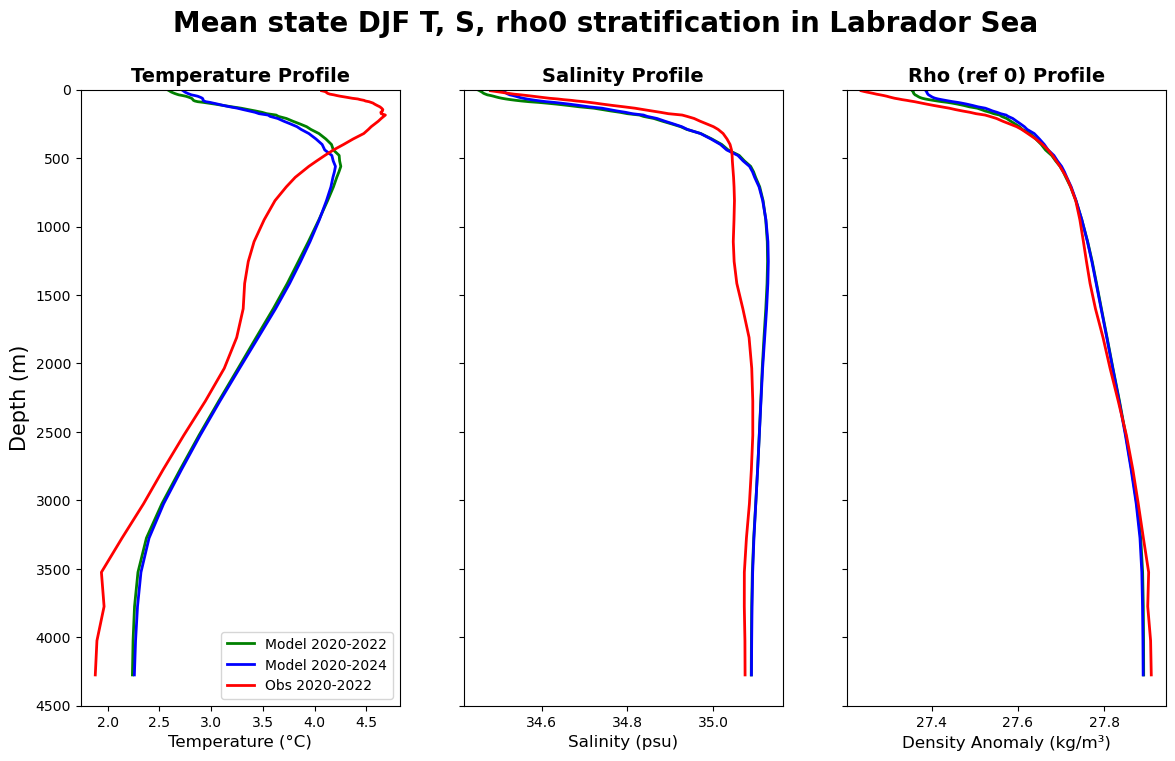

In [12]:
fn.plot_stratification(dmod.isel(time=slice(0,50)), region= "Labrador Sea", time = "DJF",output= True, output_dir="./output")

2023-07-08 23:08:18,960 - INFO - Selected for this region (latitude 50.0 to 65.0, longitude 300.0 to 325.0)
2023-07-08 23:08:18,965 - INFO - practical salinity converted to absolute salinity
2023-07-08 23:08:19,040 - INFO - potential temperature converted to conservative temperature
2023-07-08 23:08:19,152 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-08 23:08:19,268 - INFO - data selected for djf climatology
2023-07-08 23:08:23,988 - INFO - loaded EN4 data
2023-07-08 23:08:23,991 - INFO - Selected for this region (latitude 50.0 to 65.0, longitude 300.0 to 325.0)
2023-07-08 23:08:24,000 - INFO - practical salinity converted to absolute salinity
2023-07-08 23:08:24,141 - INFO - potential temperature converted to conservative temperature
2023-07-08 23:08:24,424 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-08 23:08:24,878 - INFO - data selected for djf climatology
2023-07-08 23:08:24,915 - INFO - selected the ove

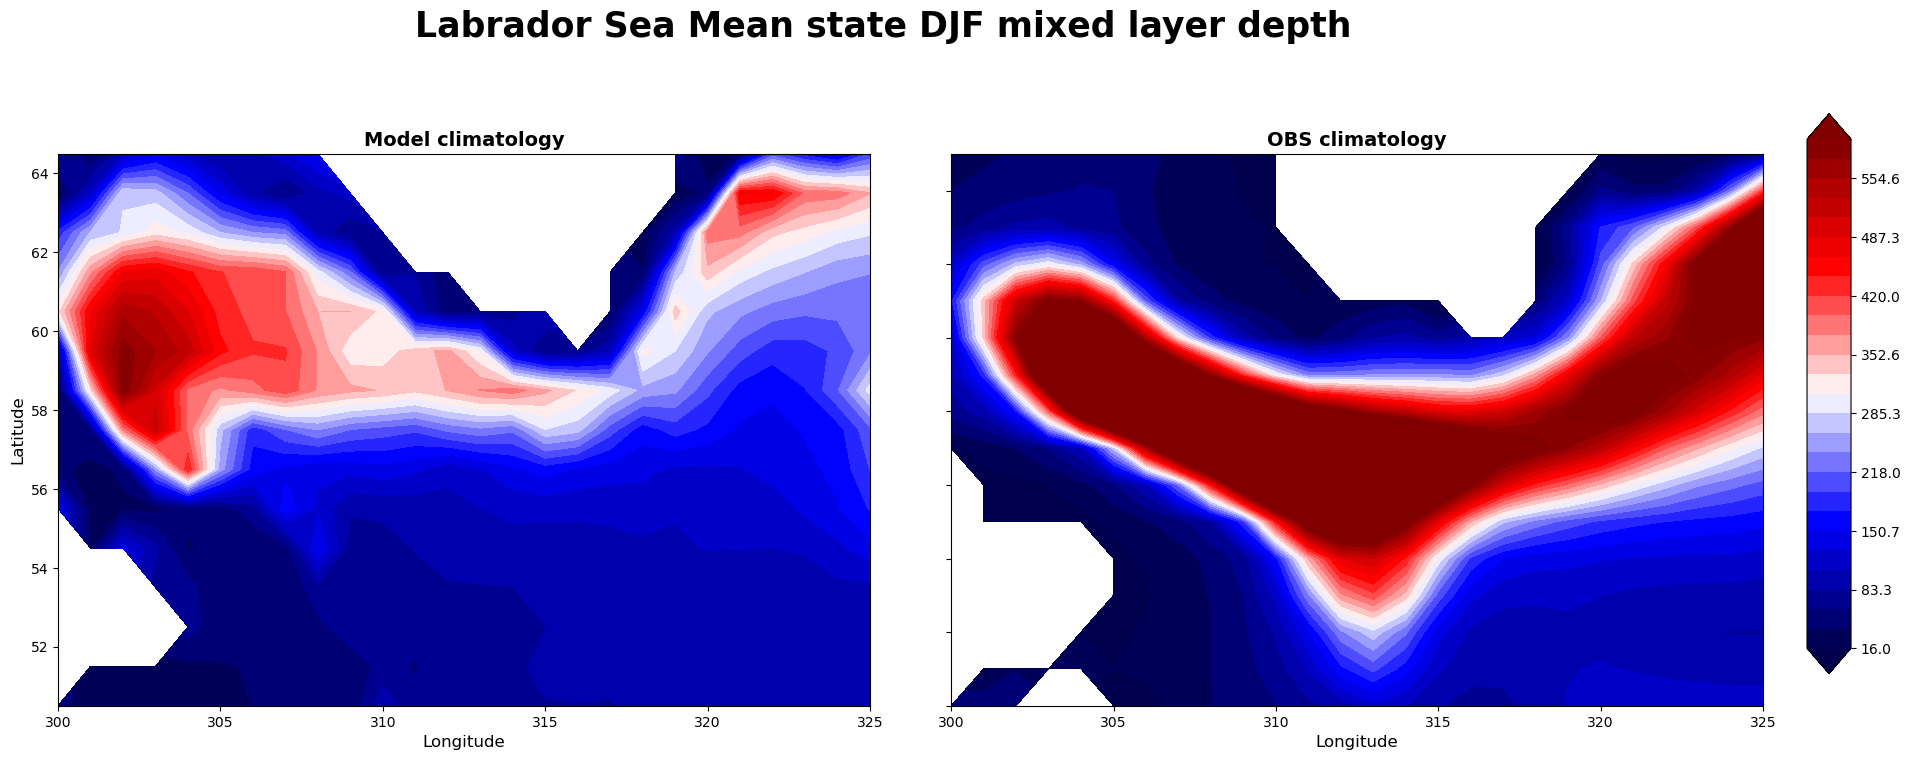

In [15]:
fn.plot_spatial_mld(dmod, region= "Labrador Sea", time = "DJF",output= True, output_dir="./output")

2023-07-08 23:10:49,988 - INFO - loaded EN4 data
2023-07-08 23:10:50,048 - INFO - selected the overlaped time of the obs data compare to the model
2023-07-08 23:10:50,069 - INFO - Selected for this region (latitude 18.0 to 30.0, longitude -97.0 to -81.0)
2023-07-08 23:10:50,149 - INFO - practical salinity converted to absolute salinity
2023-07-08 23:10:50,322 - INFO - potential temperature converted to conservative temperature
2023-07-08 23:10:50,672 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-08 23:10:50,703 - INFO - data selected for jja climatology
2023-07-08 23:10:50,710 - INFO - Selected for this region (latitude 18.0 to 30.0, longitude -97.0 to -81.0)
2023-07-08 23:10:50,738 - INFO - practical salinity converted to absolute salinity
2023-07-08 23:10:50,790 - INFO - potential temperature converted to conservative temperature
2023-07-08 23:10:50,885 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-08 23:10:5

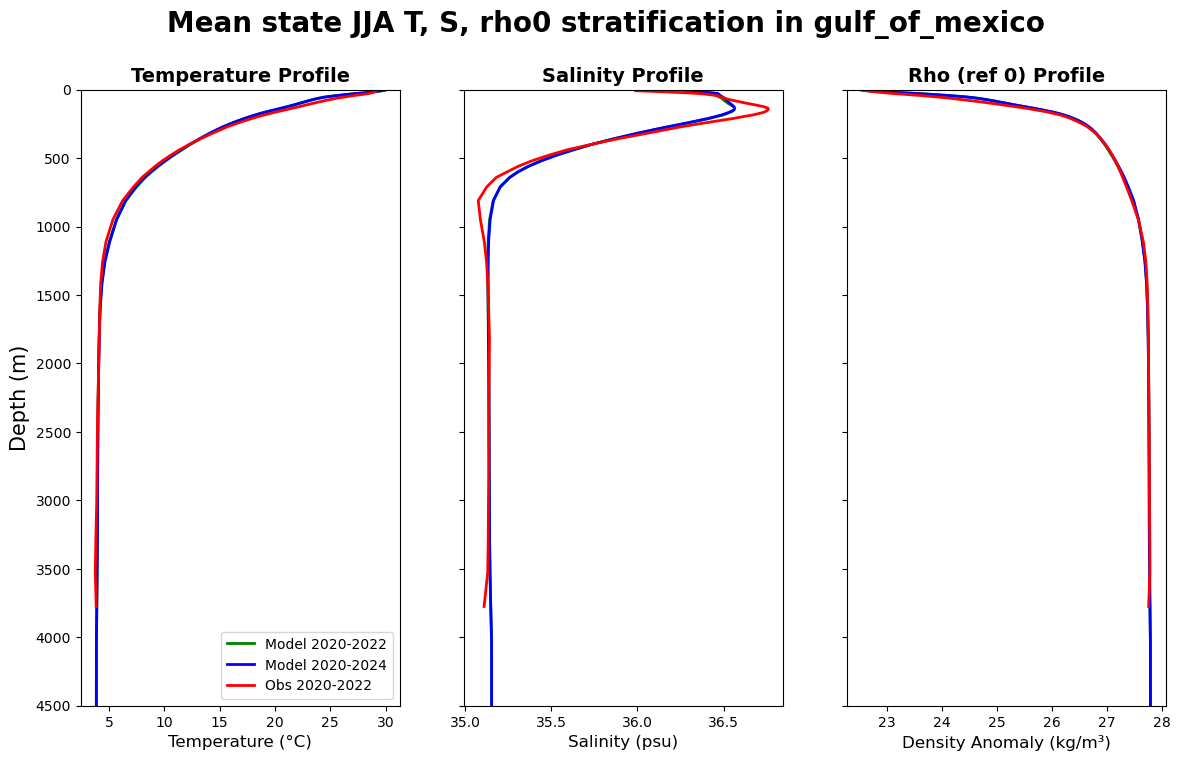

2023-07-08 23:11:49,871 - INFO - Selected for this region (latitude 18.0 to 30.0, longitude -97.0 to -81.0)
2023-07-08 23:11:49,875 - INFO - practical salinity converted to absolute salinity
2023-07-08 23:11:49,957 - INFO - potential temperature converted to conservative temperature
2023-07-08 23:11:50,110 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-08 23:11:50,266 - INFO - data selected for jja climatology
2023-07-08 23:11:55,304 - INFO - loaded EN4 data
2023-07-08 23:11:55,358 - INFO - Selected for this region (latitude 18.0 to 30.0, longitude -97.0 to -81.0)
2023-07-08 23:11:55,365 - INFO - practical salinity converted to absolute salinity
2023-07-08 23:11:55,502 - INFO - potential temperature converted to conservative temperature
2023-07-08 23:11:55,775 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-08 23:11:56,225 - INFO - data selected for jja climatology
2023-07-08 23:11:56,260 - INFO - selected the ove

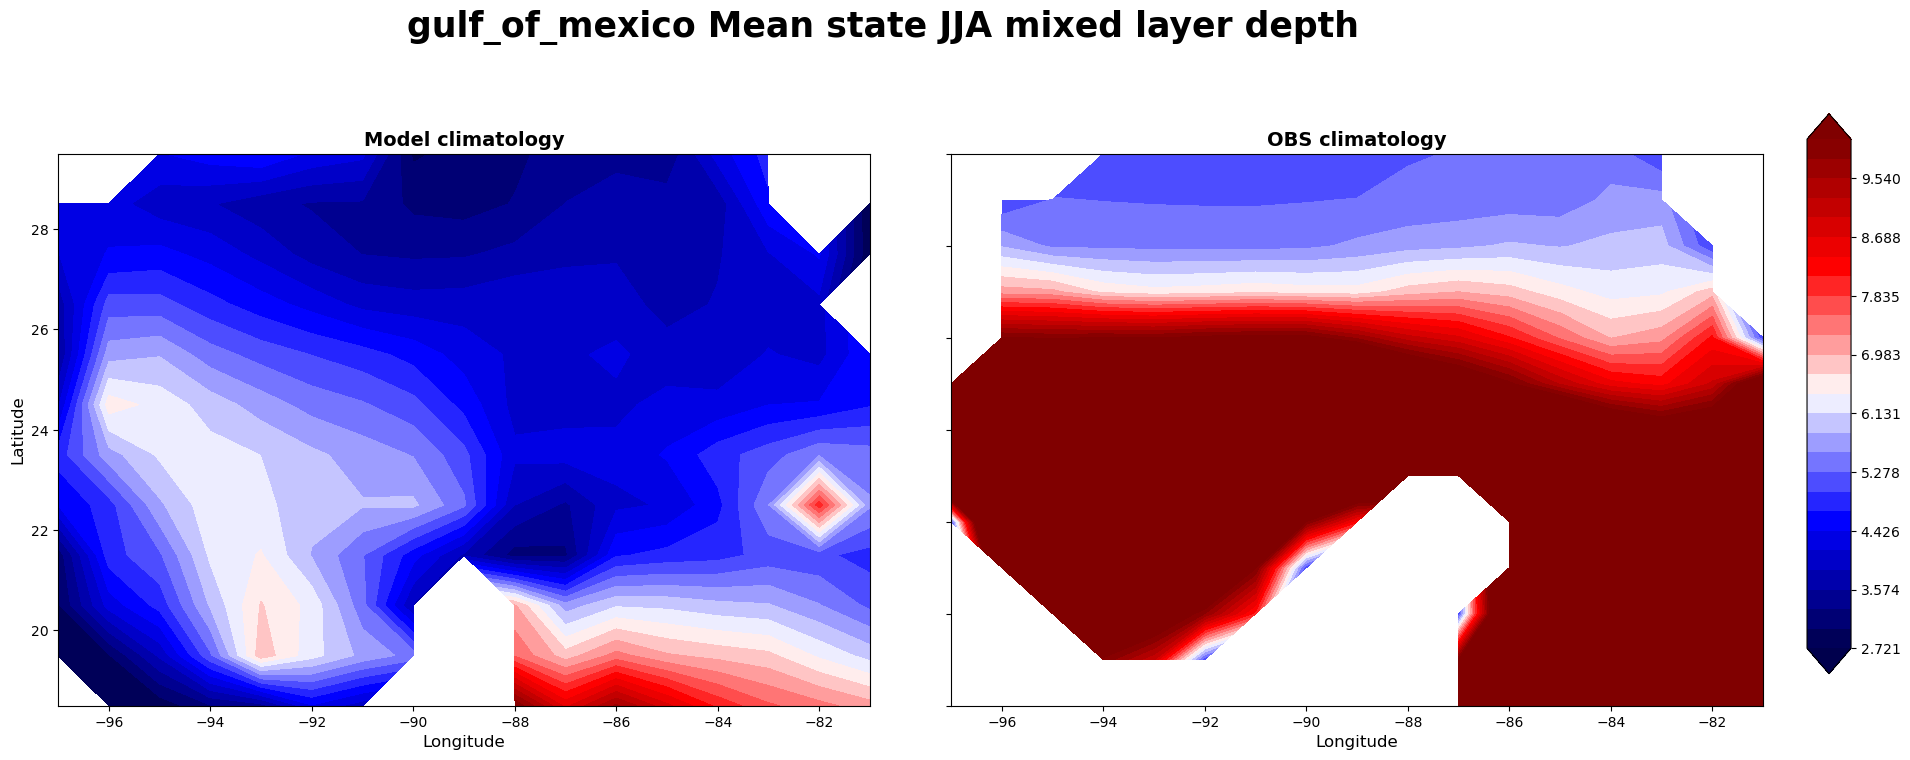

In [17]:
fn.plot_stratification(dmod, region= "gulf_of_mexico",time = "JJA", output= True, output_dir="./output")
fn.plot_spatial_mld(dmod, region= "gulf_of_mexico",time = "JJA", output= True, output_dir="./output")